In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load cleaned data (update path if needed)
df_clean = pd.read_csv('../data/cleaned_marathon_2023.csv')
df_clean.head()

,bib_number,name,country,city_state,age_group,gender,short,split,time_of_day,time,diff,min/km,km/h,min/mile,miles/h
0,3389,"Basaez, Rodolfo",CHI,Santiago,40-44,Male,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3389,"Basaez, Rodolfo",CHI,Santiago,40-44,Male,RB,05K,08:12:04AM,0 days 00:24:50,1 days 00:50:00,0 days 00:04:58,12.08,0 days 00:08:00,7.51
2,3389,"Basaez, Rodolfo",CHI,Santiago,40-44,Male,RB,10K,08:36:23AM,0 days 00:49:09,1 days 00:19:00,0 days 00:04:52,12.34,0 days 00:07:50,7.67
3,3389,"Basaez, Rodolfo",CHI,Santiago,40-44,Male,RB,15K,09:00:29AM,0 days 01:13:15,1 days 00:06:00,0 days 00:04:50,12.45,0 days 00:07:46,7.74
4,3389,"Basaez, Rodolfo",CHI,Santiago,40-44,Male,RB,20K,09:24:37AM,0 days 01:37:23,1 days 00:08:00,0 days 00:04:50,12.43,0 days 00:07:46,7.73


In [6]:
# Convert time columns to timedelta
# This is necessary to handle the time format correctly
df_clean['time'] = pd.to_timedelta(df_clean['time'], errors='coerce')
df_clean['diff'] = pd.to_timedelta(df_clean['diff'], errors='coerce')
df_clean['min/km'] = pd.to_timedelta(df_clean['min/km'], errors='coerce')
df_clean['min/mile'] = pd.to_timedelta(df_clean['min/mile'], errors='coerce')

In [8]:
# Split "City, State" into two columns
df_clean[['city', 'state']] = df_clean['city_state'].str.extract(r'^(.*?),\s*([A-Z]{2})$', expand=True)

# Filter for finishers only (FINISH split)
geo_df = df_clean[df_clean['split'] == 'Finish'].copy()

# Convert finish time to minutes
geo_df['finish_minutes'] = geo_df['time'].dt.total_seconds() / 60
geo_df.head()

,bib_number,name,country,city_state,age_group,gender,short,split,time_of_day,time,diff,min/km,km/h,min/mile,miles/h,city,state,finish_minutes
10,3389,"Basaez, Rodolfo",CHI,Santiago,40-44,Male,RB,Finish,11:11:10AM,0 days 03:23:57,0 days 00:10:05,0 days 00:04:36,13.06,0 days 00:07:24,8.12,NaN,NaN,203.950000
21,31607,"Barnett, Gavin",USA,Northlake,45-49,Male,GB,Finish,11:47:26AM,0 days 03:47:00,0 days 00:13:05,0 days 00:05:58,10.07,0 days 00:09:36,6.26,NaN,NaN,227.000000
32,45262,"Joseph, Reuben",USA,Arlington Hts,40-44,Male,RJ,Finish,01:18:23PM,0 days 04:57:15,0 days 00:15:50,0 days 00:07:13,8.32,0 days 00:11:36,5.17,NaN,NaN,297.250000
43,10604,"Felicio, Carlos",POR,Mexico City,35-39,Male,CF,Finish,11:03:07AM,0 days 03:19:26,0 days 00:11:15,0 days 00:05:08,11.71,0 days 00:08:15,7.28,NaN,NaN,199.433333
54,20742,"Meckstroth, David",USA,Issaquah,40-44,Male,DM,Finish,11:50:43AM,0 days 04:07:01,0 days 00:14:14,0 days 00:06:29,9.25,0 days 00:10:26,5.75,NaN,NaN,247.016667


In [9]:
top_cities = geo_df['city_state'].value_counts().head(10)
print(top_cities)

city_state
Chicago        5597
New York        969
Brooklyn        478
London          464
Boston          308
Naperville      264
Toronto         264
São Paulo       227
Bangkok         224
Mexico City     212
Name: count, dtype: int64


In [10]:
top_countries = geo_df['country'].value_counts().head(10)
print(top_countries)

country
USA    28992
MEX     2713
GBR     2102
CAN     1678
BRA     1221
GER      713
ITA      671
FRA      592
ESP      454
AUS      443
Name: count, dtype: int64


In [11]:
avg_time_country = geo_df.groupby('country')['finish_minutes'].mean().sort_values().head(10)
print(avg_time_country)

country
MYA    159.016667
BEN    173.783333
SMR    174.483333
ETH    177.690909
UZB    181.000000
YEM    186.483333
KOS    189.800000
ARU    192.000000
MLI    192.100000
AND    197.577778
Name: finish_minutes, dtype: float64


### Top 10 Cities by Count

C:\Users\puthr\AppData\Local\Temp\ipykernel_2004\1130335917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


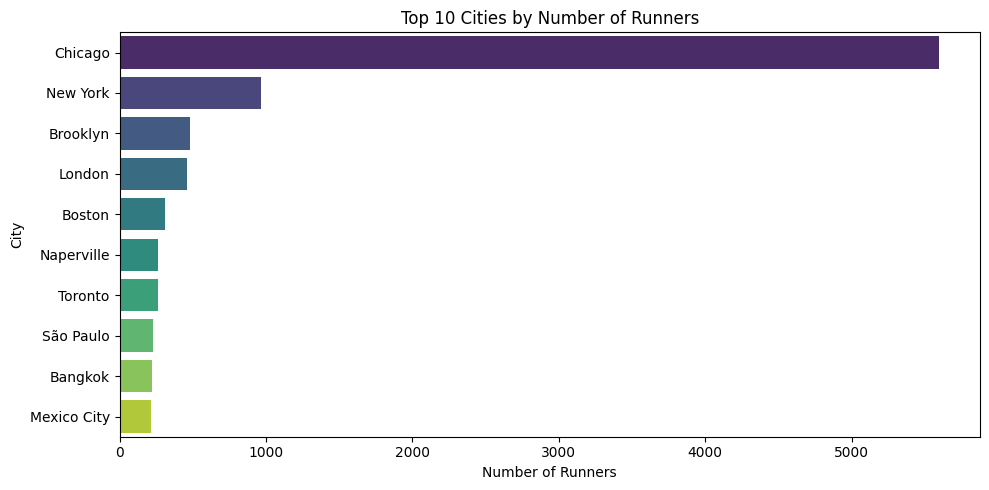

In [12]:
top_cities = geo_df['city_state'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Number of Runners')
plt.xlabel('Number of Runners')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### Top 10 Countries by Count

C:\Users\puthr\AppData\Local\Temp\ipykernel_2004\3249888227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')


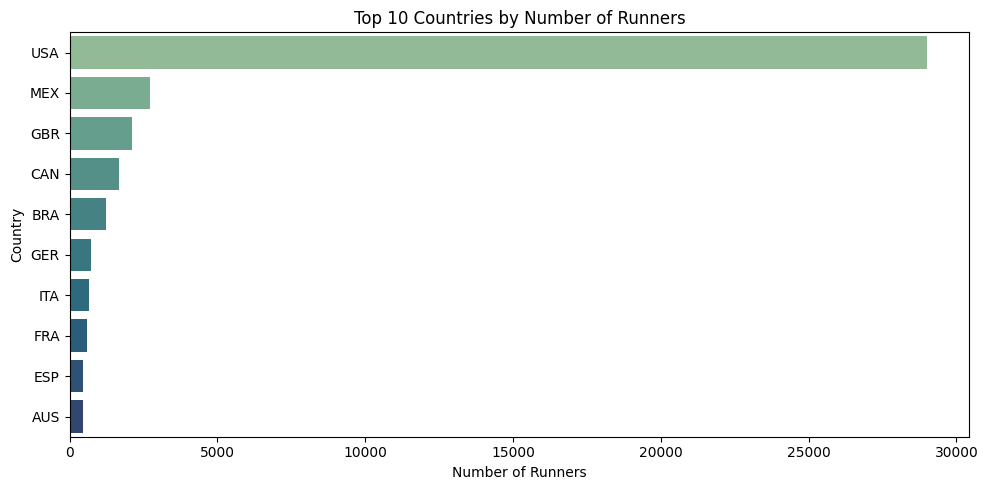

In [13]:
top_countries = geo_df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('Top 10 Countries by Number of Runners')
plt.xlabel('Number of Runners')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Top 10 Countries by Fastest Average Finish Time

C:\Users\puthr\AppData\Local\Temp\ipykernel_2004\2012638127.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_by_country.values, y=avg_time_by_country.index, palette='mako')


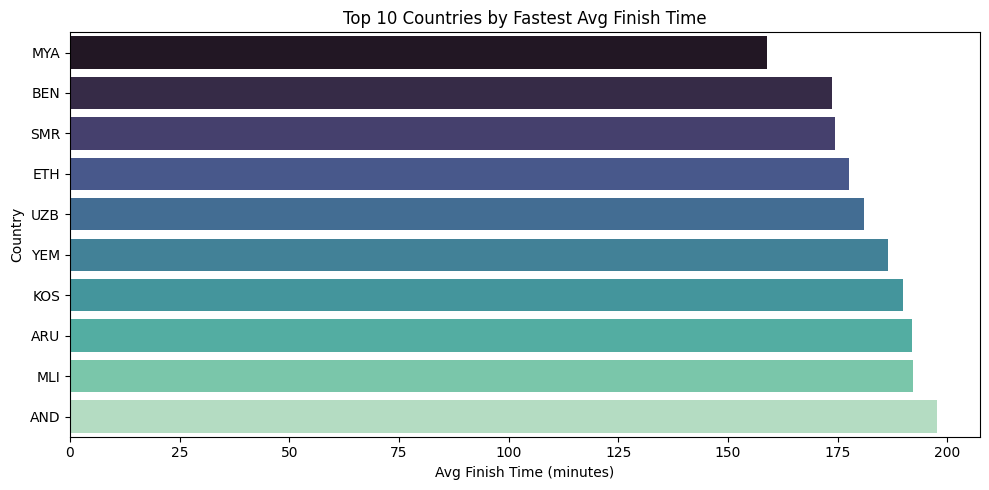

In [14]:
avg_time_by_country = geo_df.groupby('country')['finish_minutes'].mean().sort_values().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_time_by_country.values, y=avg_time_by_country.index, palette='mako')
plt.title('Top 10 Countries by Fastest Avg Finish Time')
plt.xlabel('Avg Finish Time (minutes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### US participants

In [17]:
# Filter for US finishers only
us_df = df_clean[(df_clean['country'] == 'USA') & (df_clean['split'] == 'Finish')].copy()

# Convert time to minutes if not already done
us_df['finish_minutes'] = us_df['time'].dt.total_seconds() / 60

# Drop null states (if any)
us_df = us_df[us_df['city_state'].notna()]
us_df.head()

,bib_number,name,country,city_state,age_group,gender,short,split,time_of_day,time,diff,min/km,km/h,min/mile,miles/h,city,state,finish_minutes
21,31607,"Barnett, Gavin",USA,Northlake,45-49,Male,GB,Finish,11:47:26AM,0 days 03:47:00,0 days 00:13:05,0 days 00:05:58,10.07,0 days 00:09:36,6.26,NaN,NaN,227.000000
32,45262,"Joseph, Reuben",USA,Arlington Hts,40-44,Male,RJ,Finish,01:18:23PM,0 days 04:57:15,0 days 00:15:50,0 days 00:07:13,8.32,0 days 00:11:36,5.17,NaN,NaN,297.250000
54,20742,"Meckstroth, David",USA,Issaquah,40-44,Male,DM,Finish,11:50:43AM,0 days 04:07:01,0 days 00:14:14,0 days 00:06:29,9.25,0 days 00:10:26,5.75,NaN,NaN,247.016667
65,49770,"Schaeffer, Megan",USA,Brookhaven,25-29,Female,MS,Finish,12:45:46PM,0 days 04:17:30,0 days 00:12:11,0 days 00:05:34,10.81,0 days 00:08:56,6.72,NaN,NaN,257.500000
98,57006,"Freeman, Alison",USA,South Boston,30-34,Female,AF,Finish,01:24:50PM,0 days 04:48:01,0 days 00:15:26,0 days 00:07:02,8.53,0 days 00:11:19,5.30,NaN,NaN,288.016667


In [18]:
state_summary = us_df.groupby('city_state').agg(
    runner_count=('bib_number', 'count'),
    avg_finish_time=('finish_minutes', 'mean')
).sort_values(by='runner_count', ascending=False)

print(state_summary.head(10))

             runner_count  avg_finish_time
city_state                                
Chicago              5160       277.276011
New York              795       245.126730
Brooklyn              403       244.580893
Boston                276       254.305918
Naperville            247       284.467341
Denver                194       244.389175
Washington            187       250.748663
Seattle               168       255.147421
Charlotte             165       260.536970
Los Angeles           154       252.192749


### gender-based performance within U.S.

In [19]:
# Filter USA finishers
us_df = df_clean[
    (df_clean['country'] == 'USA') &
    (df_clean['split'] == 'Finish') &
    (df_clean['gender'].isin(['Male', 'Female']))
].copy()

# Convert finish time to minutes
us_df['finish_minutes'] = us_df['time'].dt.total_seconds() / 60

# Drop rows with missing state info
us_df = us_df[us_df['city_state'].notna()]
us_df.head()

,bib_number,name,country,city_state,age_group,gender,short,split,time_of_day,time,diff,min/km,km/h,min/mile,miles/h,city,state,finish_minutes
21,31607,"Barnett, Gavin",USA,Northlake,45-49,Male,GB,Finish,11:47:26AM,0 days 03:47:00,0 days 00:13:05,0 days 00:05:58,10.07,0 days 00:09:36,6.26,NaN,NaN,227.000000
32,45262,"Joseph, Reuben",USA,Arlington Hts,40-44,Male,RJ,Finish,01:18:23PM,0 days 04:57:15,0 days 00:15:50,0 days 00:07:13,8.32,0 days 00:11:36,5.17,NaN,NaN,297.250000
54,20742,"Meckstroth, David",USA,Issaquah,40-44,Male,DM,Finish,11:50:43AM,0 days 04:07:01,0 days 00:14:14,0 days 00:06:29,9.25,0 days 00:10:26,5.75,NaN,NaN,247.016667
65,49770,"Schaeffer, Megan",USA,Brookhaven,25-29,Female,MS,Finish,12:45:46PM,0 days 04:17:30,0 days 00:12:11,0 days 00:05:34,10.81,0 days 00:08:56,6.72,NaN,NaN,257.500000
98,57006,"Freeman, Alison",USA,South Boston,30-34,Female,AF,Finish,01:24:50PM,0 days 04:48:01,0 days 00:15:26,0 days 00:07:02,8.53,0 days 00:11:19,5.30,NaN,NaN,288.016667


In [22]:
# Group by city_state and gender
city_gender_avg = us_df.groupby(['city_state', 'gender'])['finish_minutes'].mean().reset_index()
city_gender_avg

,city_state,gender,finish_minutes
0,5050 Capitol Ave,Female,295.050000
1,APO,Female,297.672222
2,APO,Male,206.416667
3,ASHFORD,Male,236.016667
4,Abbotsford,Male,221.333333
...,...,...,...
5745,schererville,Male,310.016667
5746,staten island,Female,300.483333
5747,weston,Male,318.883333
5748,woodland hills,Female,285.416667


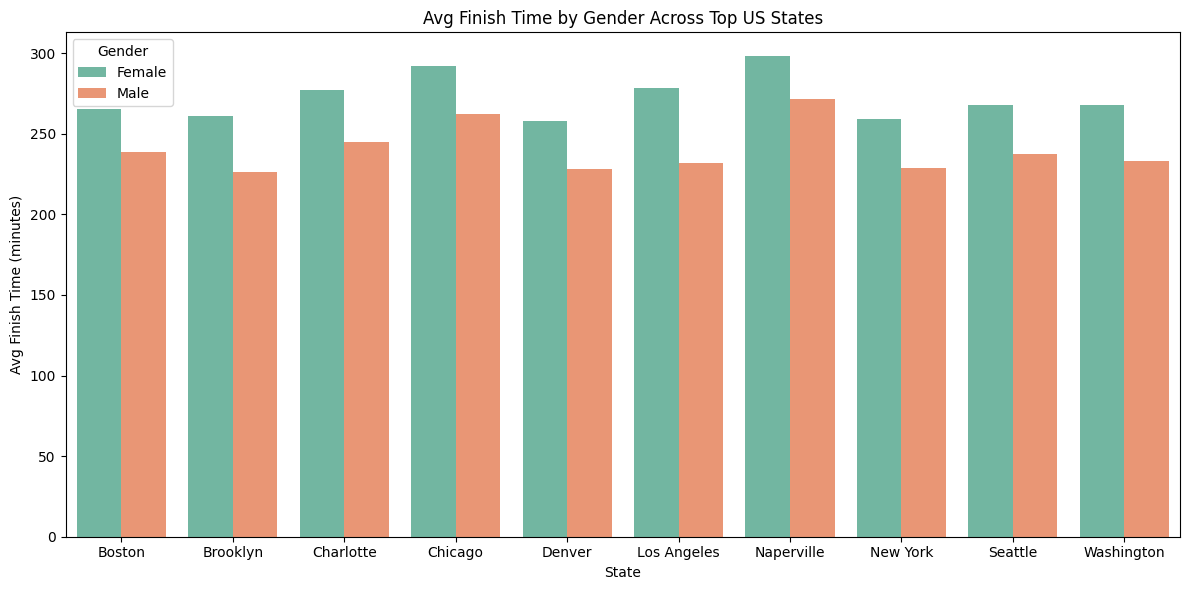

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort states by number of runners to focus on top cities (optional)
top_states = us_df['city_state'].value_counts().head(10).index.tolist()
filtered_data = city_gender_avg[city_gender_avg['city_state'].isin(top_states)]

plt.figure(figsize=(12,6))
sns.barplot(data=filtered_data, x='city_state', y='finish_minutes', hue='gender', palette='Set2')
plt.title('Avg Finish Time by Gender Across Top US States')
plt.xlabel('State')
plt.ylabel('Avg Finish Time (minutes)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### age group comparisons by city

In [25]:
# Filter for USA finishers with non-null age group and state
us_df_age = df_clean[
    (df_clean['country'] == 'USA') &
    (df_clean['split'] == 'Finish') &
    (df_clean['age_group'].notna()) &
    (df_clean['city_state'].notna())
].copy()

# Convert finish time to minutes
us_df_age['finish_minutes'] = us_df_age['time'].dt.total_seconds() / 60
us_df_age.head()

,bib_number,name,country,city_state,age_group,gender,short,split,time_of_day,time,diff,min/km,km/h,min/mile,miles/h,city,state,finish_minutes
21,31607,"Barnett, Gavin",USA,Northlake,45-49,Male,GB,Finish,11:47:26AM,0 days 03:47:00,0 days 00:13:05,0 days 00:05:58,10.07,0 days 00:09:36,6.26,NaN,NaN,227.000000
32,45262,"Joseph, Reuben",USA,Arlington Hts,40-44,Male,RJ,Finish,01:18:23PM,0 days 04:57:15,0 days 00:15:50,0 days 00:07:13,8.32,0 days 00:11:36,5.17,NaN,NaN,297.250000
54,20742,"Meckstroth, David",USA,Issaquah,40-44,Male,DM,Finish,11:50:43AM,0 days 04:07:01,0 days 00:14:14,0 days 00:06:29,9.25,0 days 00:10:26,5.75,NaN,NaN,247.016667
65,49770,"Schaeffer, Megan",USA,Brookhaven,25-29,Female,MS,Finish,12:45:46PM,0 days 04:17:30,0 days 00:12:11,0 days 00:05:34,10.81,0 days 00:08:56,6.72,NaN,NaN,257.500000
98,57006,"Freeman, Alison",USA,South Boston,30-34,Female,AF,Finish,01:24:50PM,0 days 04:48:01,0 days 00:15:26,0 days 00:07:02,8.53,0 days 00:11:19,5.30,NaN,NaN,288.016667


In [28]:
# Group by city_state and age group
city_age_avg = us_df_age.groupby(['city_state', 'age_group'])['finish_minutes'].mean().reset_index()
city_age_avg.head()

,city_state,age_group,finish_minutes
0,5050 Capitol Ave,25-29,295.050000
1,APO,30-34,274.783333
2,APO,40-44,292.566667
3,APO,50-54,230.716667
4,APO,55-59,215.216667


In [29]:
# Pick top 6 states by participation
top_states = us_df_age['city_state'].value_counts().head(6).index.tolist()
filtered_data = city_age_avg[city_age_avg['city_state'].isin(top_states)]
filtered_data.head()

,city_state,age_group,finish_minutes
977,Boston,20-24,258.906322
978,Boston,25-29,246.461640
979,Boston,30-34,248.014655
980,Boston,35-39,268.988462
981,Boston,40-44,279.608333


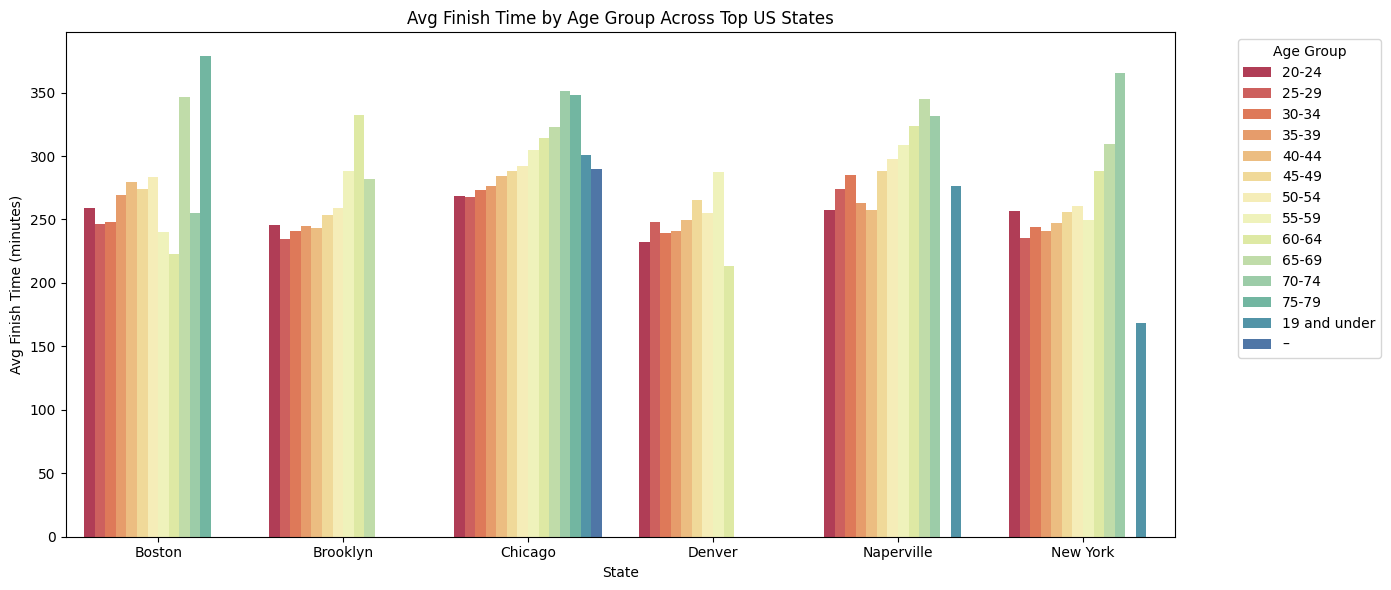

In [30]:
plt.figure(figsize=(14,6))
sns.barplot(data=filtered_data, x='city_state', y='finish_minutes', hue='age_group', palette='Spectral')
plt.title('Avg Finish Time by Age Group Across Top US States')
plt.xlabel('State')
plt.ylabel('Avg Finish Time (minutes)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()